# Data Analysis (Classification): Support Vector Machines (SVM)
Support Vector Machines performs classification by finding the hyperplane, or defining decision boundaries separating objects of different classes, that maximizes the margin between different classes.

## Import Libraries

In [1]:
# Import Required Modules and Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import sys

import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, precision_score, recall_score, roc_auc_score
from sklearn.metrics import roc_curve,classification_report, confusion_matrix

In [2]:
cd

/root


## Load Data

In [3]:
# Upload the X and y Data
X = pd.read_csv('Project/Cleaned/Classification/X.csv', na_values = ['..'])
y = pd.read_csv('Project/Cleaned/Classification/y.csv', na_values = ['..'])
X_train = pd.read_csv('Project/Cleaned/Classification/X_train.csv', na_values = ['..'])
X_test = pd.read_csv('Project/Cleaned/Classification/X_test.csv', na_values = ['..'])
y_train = pd.read_csv('Project/Cleaned/Classification/y_train.csv', na_values = ['..'])
y_test = pd.read_csv('Project/Cleaned/Classification/y_test.csv', na_values = ['..'])

# Drop Column
X.drop(['Unnamed: 0'], axis=1, inplace=True)
y.drop(['Unnamed: 0'], axis=1, inplace=True)
X_train.drop(['Unnamed: 0'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)
y_train.drop(['Unnamed: 0'], axis=1, inplace=True)
y_test.drop(['Unnamed: 0'], axis=1, inplace=True)

# Load Dictionary
dictionary_series = np.load('Project/Cleaned/dictionary_series.npy',allow_pickle='TRUE').item()

In [4]:
# Shape of Train and Test Data
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

X_test: (999, 20)
y_test: (999, 1)
X_train: (3993, 20)
y_train: (3993, 1)


## Support Vector Machines

In [5]:
# Create and Train Model
model_svc = SVC().fit(X_train,y_train.values.ravel())

# Model Prediction
y_prediction = model_svc.predict(X_test)

# Model Results
model_results = [['Score', model_svc.score(X_train, y_train)],
                 ['Accuracy', metrics.accuracy_score(y_test, y_prediction)]]
model_results_svc = pd.DataFrame(model_results, columns=['Evaluation Metric', 'Value'])
model_results_svc

,Evaluation Metric,Value
0,Score,0.938643
1,Accuracy,0.923924


## Hyperparameter Tuning

In [6]:
# Grid Search
model_svc = SVC()

C = [0.001, 0.1, 100, 100000]
gamma = [10, 1, 0.1, 0.01]

param_grid = dict(C=C,
                  gamma=gamma)

grid = GridSearchCV(estimator=model_svc, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train, y_train.values.ravel())

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.951662635939034
Best Params:  {'C': 100, 'gamma': 0.1}


### Support Vector Machines with Grid Search Parameters

In [7]:
# Create and Train Model
model_svc = SVC(C = 100, gamma = 0.1).fit(X_train,y_train.values.ravel())

# Model Prediction
y_prediction = model_svc.predict(X_test)

# Model Results
model_results = [['Score', model_svc.score(X_train, y_train)],
                 ['Accuracy', metrics.accuracy_score(y_test, y_prediction)]]
model_results_svc = pd.DataFrame(model_results, columns=['Evaluation Metric', 'Value'])
model_results_svc

,Evaluation Metric,Value
0,Score,0.982469
1,Accuracy,0.959960


## Evaluating Model

In [8]:
# Classification Report
classification_report_svc_table = classification_report(y_test,y_prediction, output_dict=True)
classification_report_svc_table = pd.DataFrame(classification_report_svc_table).transpose()
classification_report_svc_table

,precision,recall,f1-score,support
0,0.957418,0.987252,0.972106,706.00000
1,0.966790,0.894198,0.929078,293.00000
accuracy,0.959960,0.959960,0.959960,0.95996
macro avg,0.962104,0.940725,0.950592,999.00000
weighted avg,0.960166,0.959960,0.959486,999.00000


In [9]:
# Confusion Matrix
model_confusion_matrix_svc = confusion_matrix(y_test, y_prediction)
model_confusion_matrix_svc

array([[697,   9],
       [ 31, 262]])

Text(0.5, 257.44, 'Predicted label')

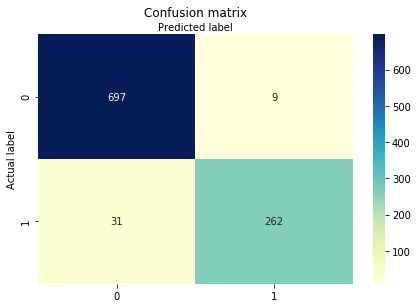

In [10]:
# Confusion Matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(model_confusion_matrix_svc))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heat Map
sns.heatmap(pd.DataFrame(model_confusion_matrix_svc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')